# The People vs Bitcoin?: An Analysis of Bitcoin as an Institional Investment

## Introduction

The implementation of Bitcoin [1] as open-source software twelve years ago has turned out to be a pivotal moment for the financial markets. Bitcoin was conceived in a whitepaper published on 31 October 2008 as a decentralised digital currency. It is decentralised in the sense that as a cryptographic currency - dubbed 'cryptocurrency' - it is neither issued nor managed by a single administrative authority such as a central bank. Instead, Bitcoin relies on a peer-to-peer bitcoin network, and is created as an incentive for node operators to engage in a process called mining. Transactions, through which the currency is sent or received, are conducted on the bitcoin network. The transactions are cryptographically verified by nodes on the network and recorded in an immutable, publicly distributed ledger called a blockchain.  

Considering its initial intended utility as a currency, it is difficult to assert whether Satoshi Nakamoto envisioned the technology as a mainstream financial asset. There are currently ongoing intense debates about the investment credibility of digital cryptocurrencies such as Bitcoin, with some investors hailing them as 'sound money', while others view them as nothing more than a speculative bubble. The criticisms for Bitcoin range from its alleged usage in criminal activity, to its energy consumption during mining, and even to questioning of the need for a different currency to exist at all. Regardless, in 2021 alone, Bitcoin had notable successes such as its adoption as legal tender by El Salvador [2], and reaching an all-time high of over US\$68,000 per bitcoin on the publicly traded markets. The former was a clear signal of Bitcoin's increased adoption and quashed the slowly prevailing opinion at the time: that Bitcoin was not useful as a currency or medium of exchange. The latter, spurred by increased adoption and the introduction of an American Bitcoin futures exchange traded fund, cemented Bitcoin's place as a legitimately tradable financial asset in the world's largest economy. Bitcoin's fixed supply, which stands in stark opposition to fiat currencies' potentially unlimited supply, seems to be the most compelling reason for investing in the cryptocurrency. This is the view expressed by institutional investors such as Michael Saylor [3], who refers to Bitcoin as property, and continues to add the asset to MicroStrategy's balance sheet.

The most prominent criticism when it comes to investing in Bitcoin is that of price volatility. The bitcoin price has gone through dramatic cycles of appreciation and depreciation. Indeed, this has become a defining feature of cryptoassets in general, with other popular cryptoassets such as Ethereum (the second largest cryptoasset by market capitalisation) exhibiting similar tendencies. The cryptoasset class is historically known to be several times more volatile than other traditional asset classes such as gold and equity indices. However, is this reason enough for an investment fund to completely avoid investing in Bitcoin? After all, high volatility can also present an opportunity for higher returns. This report seeks to provide answers to this question, based on recent market data. The aim of the report is to assess the suitability of investing some of a fund's assets into Bitcoin. This will be accomplished by analysing Bitcoin purely from an investment perspective, and comparing the asset to two traditional assets, namely gold and the S&P 500 index. The research conducted in the report is guided by the following questions:<br>
<ul>
<li>How does the performance of Bitcoin compare to the S&P 500 and the price of gold?</li>
<li>Could adding Bitcoin improve the performance of a portfolio?</li>
<li>Can Bitcoin be used as a hedge against inflation?</li>
<li>Can we build a portfolio using some or all of these assets?</li> 
</ul>

The investment fund's CFO is seeking to lower volatility in the fund. Therefore, the recommendations from this report prioritise the minimisation of overall risk.

Disclaimer: Past performance is not indicative of future performance. The work presented herein is not to be taken as financial advice; please consult with a financial advisor and/or do your own research research before investing.

## Executive Summary

Using historical prices for three assets (Bitcoin, S&P 500, gold), augmented with inflation data, the research in this report has established the following facts:

<ul>
    <li>Bitcoin significantly outperformed both the S&P 500 and gold during September 2014 and November 2021. Bitcoin returned 14,000%, the S&P 500 returned 130%, and gold returned 40% over that period.</li>
<li>Most of the gains in the S&P 500 came before the onset of the Coronavirus pandemic, whereas most of the gains in Bitcoin and gold came after the Coronavirus pandemic began.</li>
    <li>Bitcoin is the most volatile asset in the study, but it is also the most profitable.</li>
    <li>Bitcoin is approximately 7 times more volatile than gold.</li>
    <li>Bitcoin is approximately 6 times more volatile than the S&P 500.</li>
    <li>There is very little correlation among the three assets. The most correlated pair of assets, bitcoin and the S&P 500, exhibit weak positive correlation.</li>
<li>The best hedge for inflation during the seven year period was the S&P 500, and Bitcoin was a better inflation hedge than gold.</li>
</ul>

Based on the findings herein, a Global Minimum Variance portfolio, heavily weighted towards gold but including approximately 1% Bitcoin, should be recommended to the fund manager due to its low risk.

## Data and Methods

### Libraries

In [1]:

import math
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

plt.style.use('seaborn-paper')

### The Data Set

#### Bitcoin Data

In [2]:

bitcoin_prices = pd.read_csv('./data/bitcoin-usd.csv', parse_dates=['date'])
bitcoin_prices = bitcoin_prices.sort_values(by='date')
bitcoin_prices.set_index('date', inplace=True)
bitcoin_prices

,open,high,low,close,volume
date,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,2.105680e+07
2014-09-18,456.859985,456.859985,413.104004,424.440002,3.448320e+07
2014-09-19,424.102997,427.834991,384.532013,394.795990,3.791970e+07
2014-09-20,394.673004,423.295990,389.882996,408.903992,3.686360e+07
2014-09-21,408.084991,412.425995,393.181000,398.821014,2.658010e+07
...,...,...,...,...,...
2021-11-13,64158.121094,64915.675781,63303.734375,64469.527344,3.047423e+10
2021-11-14,64455.371094,65495.179688,63647.808594,65466.839844,2.512209e+10
2021-11-15,65521.289063,66281.570313,63548.144531,63557.871094,3.055876e+10


In [3]:
bitcoin_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2619 entries, 2014-09-17 to 2021-11-17
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    2615 non-null   float64
 1   high    2615 non-null   float64
 2   low     2615 non-null   float64
 3   close   2615 non-null   float64
 4   volume  2615 non-null   float64
dtypes: float64(5)
memory usage: 122.8 KB


#### S&P 500 Data

In [4]:

sp500_prices = pd.read_csv('./data/sp500.csv', parse_dates=['date'])
sp500_prices = sp500_prices.sort_values(by='date')
sp500_prices.set_index('date', inplace=True)
sp500_prices

,open,high,low,close,volume
date,,,,,
2014-09-17,1999.300049,2010.739990,1993.290039,2001.569946,3209420000
2014-09-18,2003.069946,2012.339966,2003.069946,2011.359985,3235340000
2014-09-19,2012.739990,2019.260010,2006.589966,2010.400024,4880220000
2014-09-22,2009.079956,2009.079956,1991.010010,1994.290039,3349670000
2014-09-23,1992.780029,1995.410034,1982.770020,1982.770020,3279350000
...,...,...,...,...,...
2021-11-09,4707.250000,4708.529785,4670.870117,4685.250000,3110230000
2021-11-10,4670.259766,4684.850098,4630.859863,4646.709961,3581630000
2021-11-11,4659.390137,4664.549805,4648.310059,4649.270020,2623140000


In [5]:
sp500_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1805 entries, 2014-09-17 to 2021-11-15
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    1805 non-null   float64
 1   high    1805 non-null   float64
 2   low     1805 non-null   float64
 3   close   1805 non-null   float64
 4   volume  1805 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 84.6 KB


#### Gold and Inflation Data

In [6]:

monthly_data = pd.read_csv('./data/monthly_data.csv', parse_dates=['date'])
monthly_data = monthly_data.sort_values(by='date')
monthly_data.set_index('date', inplace=True)
monthly_data

,gold_usd,cpi_us
date,,
2014-09-01,1241.330,237.852
2014-10-01,1223.565,238.031
2014-11-01,1176.413,237.433
2014-12-01,1200.440,236.151
2015-01-01,1249.333,234.812
...,...,...
2021-07-01,1774.800,271.696
2021-08-01,1817.000,273.003
2021-09-01,1816.700,273.567


In [7]:
monthly_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 87 entries, 2014-09-01 to 2021-11-01
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gold_usd  87 non-null     float64
 1   cpi_us    87 non-null     float64
dtypes: float64(2)
memory usage: 2.0 KB


### Data Cleaning

In [8]:
# Calculate simple returns of the assets over time
bitcoin_prices['btc_returns'] = bitcoin_prices['close'].pct_change()
sp500_prices['sp_returns'] = sp500_prices['close'].pct_change()
monthly_data['gld_returns'] = monthly_data['gold_usd'].pct_change()

# Upsample BTC and SP500 returns to monthly returns to match Gold returns
btc_returns_monthly = bitcoin_prices[['btc_returns']].resample('M').apply(lambda x: ((x + 1).cumprod() - 1).last("D")) 
sp_returns_monthly = sp500_prices[['sp_returns']].resample('M').apply(lambda x: ((x + 1).cumprod() - 1).last("D")) 

# Match dates and number of observations
# Gold first date observation ~ BTC/SP500 last date observation
btc_pct_monthly_returns = btc_returns_monthly[:-1].dropna().to_numpy()
sp_pct_monthly_returns = sp_returns_monthly[:-1].dropna().to_numpy()
gld_pct_monthly_returns = monthly_data['gld_returns'].dropna().to_numpy()

# Shift dates of BTC and S&P500 returns dataframes to match
btc_returns_monthly['shifted_date'] = btc_returns_monthly.index + pd.TimedeltaIndex([1 for i in range(len(btc_returns_monthly))], unit='D')
sp_returns_monthly['shifted_date'] = sp_returns_monthly.index + pd.TimedeltaIndex([1 for i in range(len(sp_returns_monthly))], unit='D')

# Create dataframe of monthly returns
returns_df = pd.merge(btc_returns_monthly, sp_returns_monthly, on='shifted_date')
returns_df = pd.merge(returns_df, monthly_data[['gld_returns']], left_on='shifted_date', right_on='date')
returns_df = returns_df.rename(columns={'shifted_date':'date'})
returns_df.set_index('date', inplace=True)
returns_df.head()

,btc_returns,sp_returns,gld_returns
date,,,
2014-10-01,-0.153914,-0.014628,-0.014311
2014-11-01,-0.125659,0.023201,-0.038537
2014-12-01,0.117421,0.024534,0.020424
2015-01-01,-0.153034,-0.004189,0.040729
2015-02-01,-0.320835,-0.031041,-0.014594


## Asset Performance

In general, the aim of an investor is to grow their capital by purchasing assets that increase in value. The question, then, is did Bitcoin increase in value? If so, by how much? How did this increase in value fare compare to other assets? What actions could the investment fund have taken to profit from these events?

The first section of this study will answer these questions by examining the performance of Bitcoin against that of the S&P 500 index and gold. This section focuses on analysing the price evolution of the three assets both individually and relative to each other. The objective of this activity is to establish past price performance, which although not necessarily a guide to future performance, can act as a guide towards formulating an investment thesis.

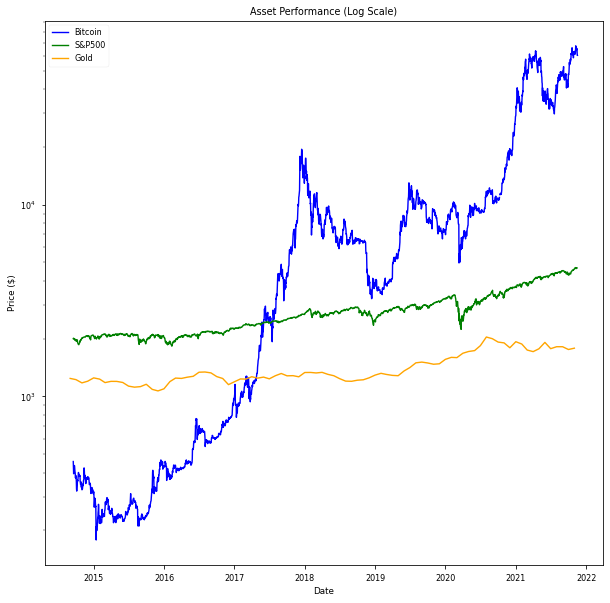

In [9]:

# Plot line graph of asset prices
std_figure_size = (10, 10)
plt.figure(figsize=std_figure_size)
plt.plot(bitcoin_prices['close'], label='Bitcoin', color='blue')
plt.plot(sp500_prices['close'], label='S&P500', color='green')
plt.plot(monthly_data['gold_usd'], label='Gold', color='orange')
plt.legend()
plt.title('Asset Performance (Log Scale)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.yscale('log')
plt.show()

Plotting the asset price of Bitcoin, S&P 500 and gold relative to each other, as shown above, reveals that <b>Bitcoin significantly outperformed both the S&P 500 and gold</b>. In general terms, during the seven year period in question, Bitcoin was initially priced lower than all the other assets, but was priced orders of magnitude higher. As a matter of fact, because of the magnitude with which Bitcoin's price outgrew the other two assets, the above figure is presented on a logarithmic scale. If a linear scale had been used, the price evolution of the other two assets would have been obscured to resemble a horizontal line. Moving from the general to the specific, a more detailed analysis of Bitcoin's outperformance relative to each asset is conducted below.

### Bitcoin vs S&P 500 Index

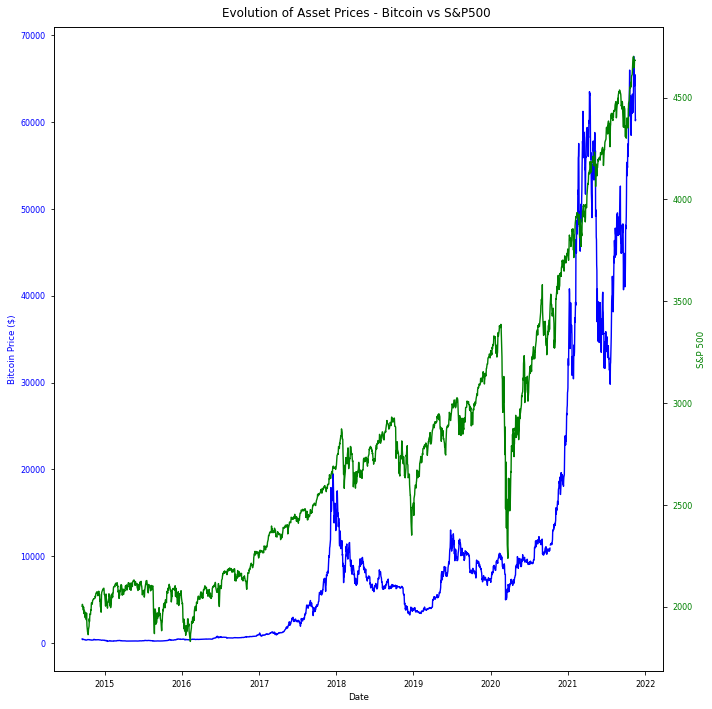

In [10]:

fig, ax1 = plt.subplots(figsize=(std_figure_size))
fig.suptitle('Evolution of Asset Prices - Bitcoin vs S&P500')

color = 'blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Bitcoin Price ($)', color=color)
ax1.plot(bitcoin_prices['close'], label='Bitcoin', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'green'
ax2.set_ylabel('S&P 500', color=color)  
ax2.plot(sp500_prices['close'], label='S&P 500', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 
plt.show()

The above figure compares Bitcoin's price to that of the S&P 500 during the last seven years. During that time, <b>Bitcoin's price rose from \$465 to close at \$60,276 </b> after reaching an all-time high of \$68,789. <b>The S&P 500 rose from 1,999 to 4,682 </b> after reaching an all-time high of 4,701. This represents a gain of 14,000\% for Bitcoin, while the S&P 500 index doubled over the period to return just under 140\% to investors.</b> 

While the S&P 500's performance is impressive, Bitcoin's performance is nothing short of astounding. Interestingly, most of Bitcoin's gains occured after the onset of the Coronavirus pandemic, whereas the inverse is true for the S&P 500. Some commentators have attributed this phenomenon to the adoption of Bitcoin as a store of value and a hedge against the inflation [4] that was forecasted after the Federal Reserve implemented loose monetary policy to revive the American economy. Some even go as far as suggesting that this was a tipping point in Bitcoin's adoption as a currency, after it became evident that the US Dollar would continue to be inflated in the near future, potentially causing the currency's devaluation. In this light, Bitcoin (with its fixed supply of 21 million units) was seen as a deflationary and unltimately more valuable currency, and store of value, relative to the US Dollar. Whether Bitcoin is truly an inflation hedge - a task traditionally associated with gold - will be analysed later in this report. 

### Bitcoin vs Gold

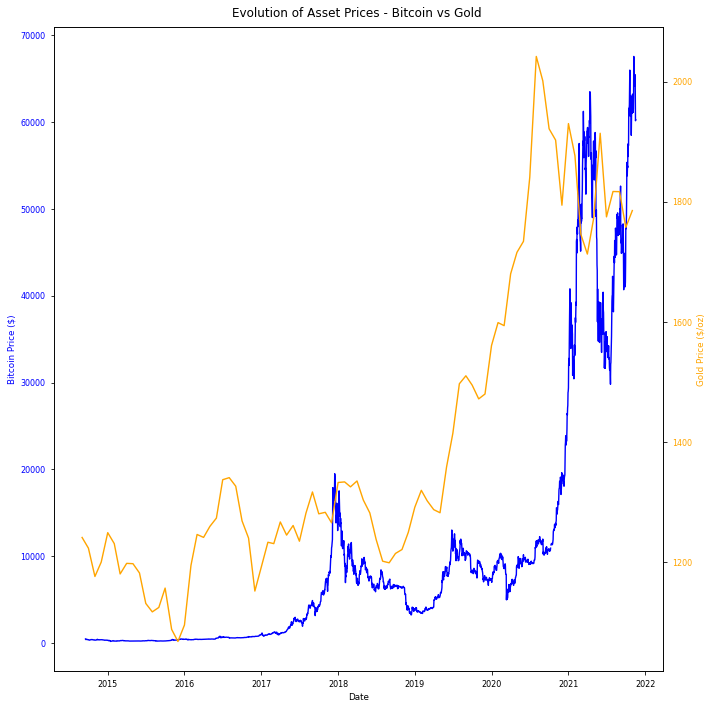

In [11]:

fig, ax1 = plt.subplots(figsize=std_figure_size)
fig.suptitle('Evolution of Asset Prices - Bitcoin vs Gold')

color = 'blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Bitcoin Price ($)', color=color)
ax1.plot(bitcoin_prices['close'], label='Bitcoin', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() 
color = 'orange'
ax2.set_ylabel('Gold Price ($/oz)', color=color)  
ax2.plot(monthly_data['gold_usd'], label='Gold', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 
plt.show()

The above figure compares Bitcoin's price to that of gold during the last seven years. We have previously noted that during that time, Bitcoin's price rose from \$465 and closed at \$60,276 after reaching an all-time high of \$68,789. <b>The price per ounce of gold climbed steadily from \$1,241 to \$1,785 </b> over the same period, having notched an all time high of \$2,041 during the height of the Coronavirus pandemic when investors were fleeing to safety. At its highest price, an investor in gold would have made just over 60\% return from their money, meaning that a \
\$10,000 investment would have grown to approximately \$16,000. 

While gold's rate of return pales in comparison to that of Bitcoin and the S&P 500 index, some investors consider it a worthy tradeoff for peace of mind. Investing in gold, traditionally viewed as safe-haven asset, was profitable during the stock market crash of March 2020 when the S&P 500 fell 34\% due to fears induced by the Coronavirus pandemic. Around the same time, Bitcoin's also fell over 40\%. Although gold dipped briefly due to a temporary spike in the US Dollar price, it held its ground and even went on a parabolic rise upwards before reaching its all-time high in August 2020. When the flight to safety ended and investor risk appetite resumed, gold clearly suffered as a result, dropping almost 20\% from the highs it had recently established. The trebling of Bitcoin's price, when gold's price was in freefall, has been viewed by some as the mainstream adoption of Bitcoin as 'digital gold' [4], with investors clearly preferring Bitcoin as a store of value and a better hedge for inflation than gold.

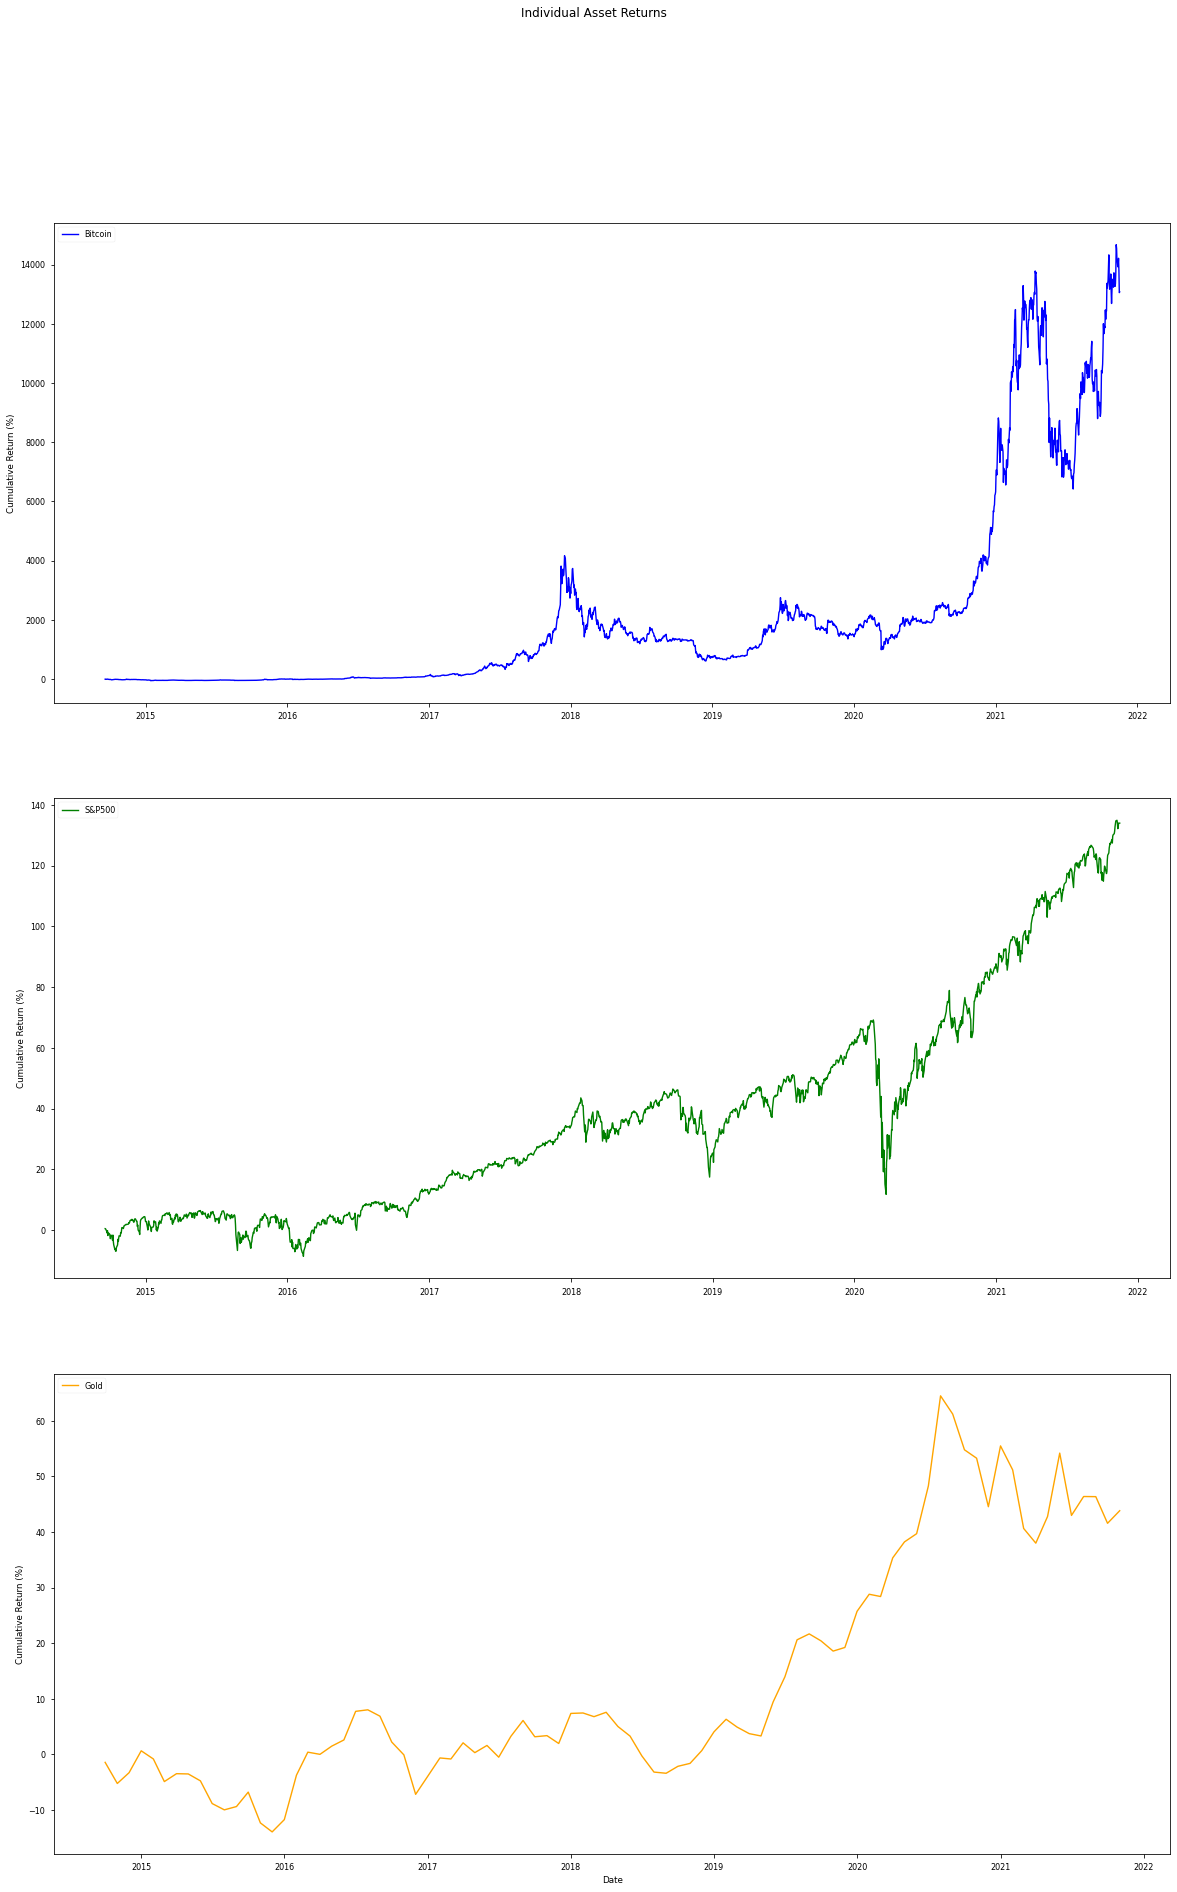

In [12]:
fig, ax = plt.subplots(3,1, figsize=(20,30))
fig.suptitle('Individual Asset Returns')
label_position = 'upper left'

ax[0].plot(((1+bitcoin_prices['btc_returns']).cumprod()-1)*100, label='Bitcoin', color='blue')
ax[0].set_ylabel('Cumulative Return (%)')
ax[0].legend(loc=label_position)
ax[1].plot(((1+sp500_prices['sp_returns']).cumprod()-1)*100, label='S&P500', color='green')
ax[1].set_ylabel('Cumulative Return (%)')
ax[1].legend(loc=label_position)
ax[2].plot(((1+monthly_data['gld_returns']).cumprod()-1)*100, label='Gold', color='orange')
ax[2].set_ylabel('Cumulative Return (%)')
ax[2].legend(loc=label_position)

plt.xlabel('Date')
plt.show()


### Section Summary

The data confirm that Bitcoin significantly outperformed both the S&P 500 and gold. As shown by the cumulative return plots above, Bitcoin returned 14,000\% during the seven year period under study, followed by the S&P 500's 130\% return, and gold's 40% return (approximately). This section is summarised as follows:
<ul>
    <li>Bitcoin was, by far, the best performing asset during the period.</li>
<li>Bitcoin outperformed the S&P 500 by a factor of 100. Most of the gains in the S&P 500 came before the onset of the Coronavirus pandemic, whereas most of the gains in Bitcoin came after the Coronavirus pandemic began.</li>
<li>Bitcoin outperformed gold by a factor of 233. Investors seem to have preferred Bitcoin as 'digital gold', in contrast to traditional gold.</li>
</ul>

The next section focuses on analysing the returns and volatility profiles of Bitcoin, gold and the S&P 500.

## Asset Returns and Volatility Profiling

Having analysed price evolution and deduced that Bitcoin significantly outperformed both the S&P 500 and gold during the last seven years, the focus will now shift to the risk associated with the return achieved. There is generally no free lunch in investing, and  returns are usually closely associated to risk. It can be argued assets such as bonds issued by the US Treasury, usually viewed as being risk-free, constitute a free lunch; but even these assets are theoretically subject to default risk, while typically yielding little return, thereby reinforcing the point that returns and risk are intertwined. 

In this section of the report, we will assess the risk and return profiles of Bitcoin, the S&P 500 and gold. The analsis will be guided by questions such as: How much risk would have been taken by investing in Bitcoin? Could the fund have lowered this risk by investing in other assets? Are the risk modelling assumptions valid? Considering that the investment fund manager is seeking to reduce the fund's volatility, this section is a prelude to constructing a portfolio based on some or all of the assets based on the inherent volatility.

### Frequency Distribution

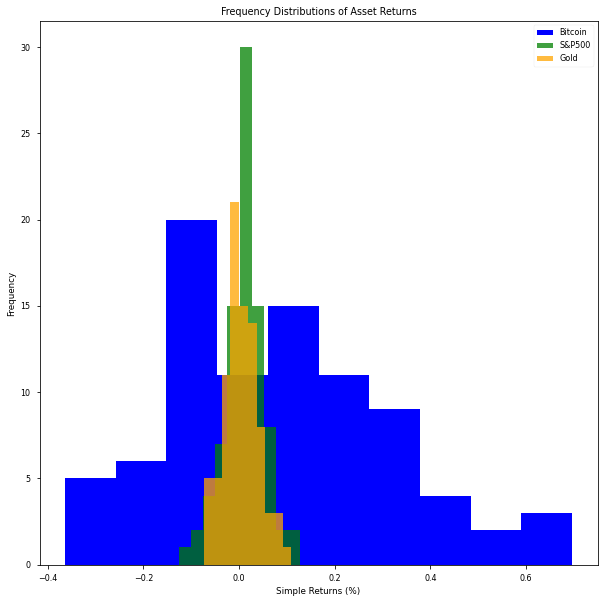

In [13]:

# Frequency distribution of returns
plt.figure(figsize=std_figure_size)
plt.hist(btc_pct_monthly_returns, bins=math.ceil(np.sqrt(len(btc_pct_monthly_returns))), density=False, label='Bitcoin', color='blue')
plt.hist(sp_pct_monthly_returns, bins=math.ceil(np.sqrt(len(sp_pct_monthly_returns))), density=False, label='S&P500', color='green', alpha=0.75)
plt.hist(gld_pct_monthly_returns, bins=math.ceil(np.sqrt(len(gld_pct_monthly_returns))), density=False, label='Gold', color='orange', alpha=0.75)
plt.legend()
plt.title('Frequency Distributions of Asset Returns')
plt.xlabel('Simple Returns (%)')
plt.ylabel('Frequency')
plt.show()

The frequency distribution of monthly returns suggests that the returns distribution of Bitcoin has fatter tails than that of the S&P 500 and gold. This suggests that <b>there is a higher probability of events that produced outsized gains or losses for Bitcoin that for the other two assets, indicating extremely high volatility</b>. However, fat tails can also signal opportunity. For example, it can be seen from Bitcoin's return distribution that although there have been months with losses of almost 40\%, there are as many months with gains of 40\% or more, with the highest returning months yielding over 60\%.

Conversely, gold's returns distribution most closely resembles a normal distribution, implying a more balanced set of returns outcomes and significantly lower volatility. S&P 500 returns, although not normally distributed, can be characterised as a middle ground between Bitcoin and gold. The S&P 500 returns distribution suggests medium volatility and, in the long run, positively cumulative returns. 

### Time Series

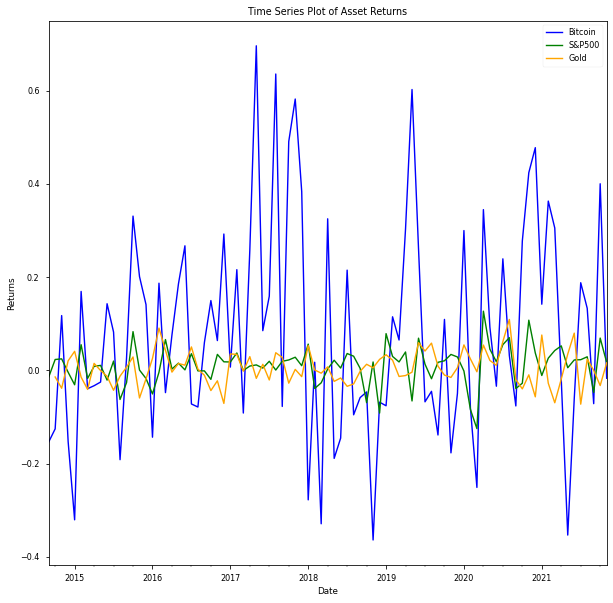

In [14]:

# Plot returns as time series
plt.figure(figsize=std_figure_size)
btc_returns_monthly.btc_returns.plot(label='Bitcoin', color='blue')
sp_returns_monthly.sp_returns.plot(label='S&P500', color='green')
monthly_data['gld_returns'].plot(label='Gold', color='orange')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('Time Series Plot of Asset Returns')
plt.show()

The time series plot of monthly asset returns confirms the findings from the frequency distribution. <b>Bitcoin returns vary significantly over time and are significantly more volatile than both the S&P 500 and gold returns.</b> Interestingly, Bitcoin returns also appear somewhat nonstationary in the first half of the period under study. Although this observation could benefit from further testing through the Dickey-Fuller [5] test for example, it can be seen that the returns profile was in a slight uptrend up till 2018, when it started to exhibit stationary tendencies.

Gold returns remain stationary throughout the seven year period and exhibit the lowest amount of variability. S&P 500 returns, although exhibiting more variability than gold returns, can be seen as being significantly less variable and volatile than Bitcoin returns. When coupled with the frequency distribution, the time series deduction is that Bitcoin is generally a more volatile asset than the S&P 500 or gold. 

### Distribution Moments

Volatility is the traditional measure of risk in financial markets. This is the metric we're assuming the fund manager prioritises. However, as an investor, the fund manager's second concern is asset appreciation, measured by returns. It is therefore prudent to compute each asset's returns and compare these to the associated risk. This will enable the fund manager to acquire a clearer picture of each asset's suitability for investment. 

It would also be interesting to know if the models of risk and return computed by the fund can be relied on. One of the most important assumptions underlying risk and return models is that the returns data are normally distributed. Since the model outputs are relied on for investment decisions, it is crucial to ensure that this model assumption is valid. Therefore, alongside computing risk and return profiles for the three assets under consideration, the normality assumption will also be tested.

#### Bitcoin Distribution Moments

In [15]:

# Calculate BTC moments
btc_mean_ret = np.mean(btc_pct_monthly_returns)
btc_ann_ret = (((1+btc_mean_ret)**12)-1) * 100
btc_vol = np.std(btc_pct_monthly_returns)
btc_ann_vol = (btc_vol * np.sqrt(12)) * 100
btc_skew = stats.skew(btc_pct_monthly_returns)
btc_kurtosis = stats.kurtosis(btc_pct_monthly_returns)

p_value = stats.shapiro(btc_pct_monthly_returns)[1]
print("p-value:", p_value)
if p_value <= 0.05:
    print("Null hypothesis is rejected. The BITCOIN data are likely not normal.")
else:
    print("Null hypothesis not rejected. The BITCOIN data are likely normal.")

p-value: 0.12015186250209808
Null hypothesis not rejected. The BITCOIN data are likely normal.


#### S&P 500 Distribution Moments

In [16]:

# Calculate S&P500 moments
sp_mean_ret = np.mean(sp_pct_monthly_returns)
sp_ann_ret = (((1+sp_mean_ret)**12)-1) * 100
sp_vol = np.std(sp_pct_monthly_returns)
sp_ann_vol = (sp_vol * np.sqrt(12)) * 100
sp_skew = stats.skew(sp_pct_monthly_returns)
sp_kurtosis = stats.kurtosis(sp_pct_monthly_returns)

p_value = stats.shapiro(sp_pct_monthly_returns)[1]
print("p-value:", p_value)
if p_value <= 0.05:
    print("Null hypothesis is rejected. The S&P500 data are likely not normal.")
else:
    print("Null hypothesis not rejected. The S&P500 data are likely normal.")

p-value: 0.027456678450107574
Null hypothesis is rejected. The S&P500 data are likely not normal.


#### Gold Distribution Moments

In [17]:

# Calculate GLD moments
gld_mean_ret = np.mean(gld_pct_monthly_returns)
gld_ann_ret = (((1+gld_mean_ret)**12)-1) * 100
gld_vol = np.std(gld_pct_monthly_returns)
gld_ann_vol = (gld_vol * np.sqrt(12)) * 100
gld_skew = stats.skew(gld_pct_monthly_returns)
gld_kurtosis = stats.kurtosis(gld_pct_monthly_returns)

p_value = stats.shapiro(gld_pct_monthly_returns)[1]
print("p-value:", p_value)
if p_value <= 0.05:
    print("Null hypothesis is rejected. The GOLD data are likely not normal.")
else:
    print("Null hypothesis not rejected. The GOLD data are likely normal.")

p-value: 0.681982696056366
Null hypothesis not rejected. The GOLD data are likely normal.


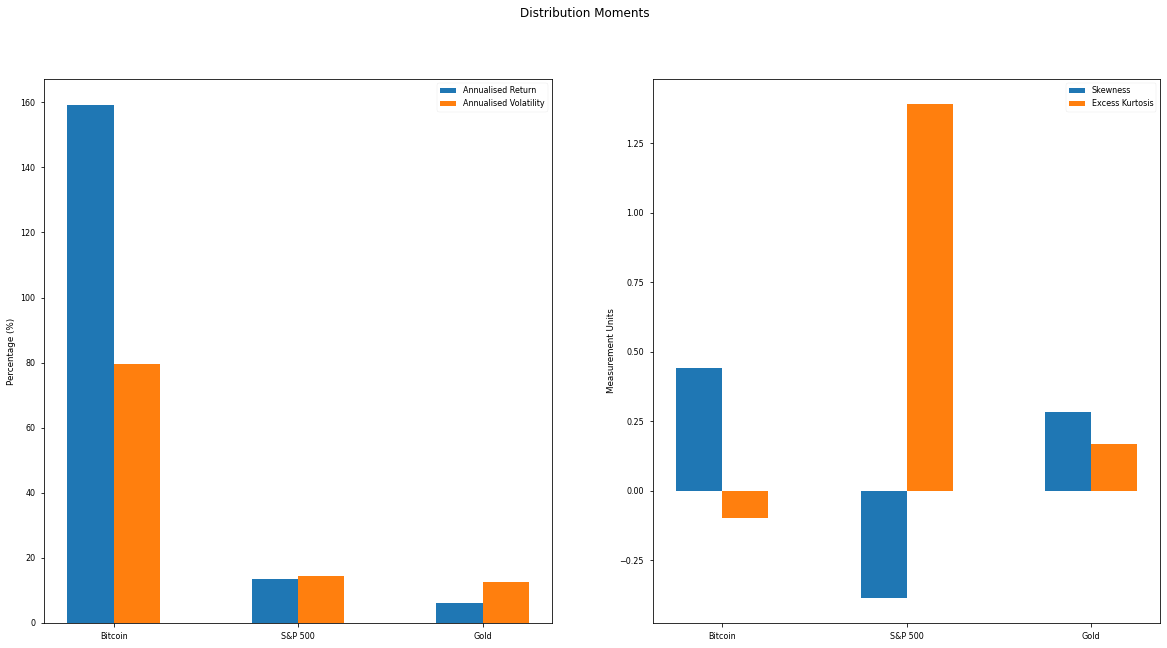

In [18]:

# Plot distribution moments summary
bar_data = [[btc_ann_ret, sp_ann_ret, gld_ann_ret],
            [btc_ann_vol, sp_ann_vol, gld_ann_vol],
            [btc_skew, sp_skew, gld_skew],
            [btc_kurtosis, sp_kurtosis, gld_kurtosis]
           ]

fig, ax = plt.subplots(1,2, figsize=(20,10), sharex=True)
fig.suptitle('Distribution Moments')

bar_ind = np.arange(3)
bar_width=0.25

ax[0].bar(bar_ind, bar_data[0], bar_width, label='Annualised Return')
ax[0].bar(bar_ind+bar_width, bar_data[1], bar_width, label='Annualised Volatility')
ax[0].set_ylabel('Percentage (%)')
ax[0].legend()

ax[1].bar(bar_ind, bar_data[2], bar_width, label='Skewness')
ax[1].bar(bar_ind+(bar_width), bar_data[3], bar_width, label='Excess Kurtosis')
ax[1].set_ylabel('Measurement Units')

plt.xticks(bar_ind+bar_width/2, ('Bitcoin', 'S&P 500', 'Gold'))

plt.legend()
plt.show()

<b>According to traditional finance metrics such as mean returns and volatility, Bitcoin is the highest return, highest risk asset in this study. However, Bitcoin is also the best-performing asset on a risk-adjusted basis.</b> Bitcoin yielded an annualised mean return of 159\% during the period of study. On an absolute basis, this rate of high return came with high risk: 79\% annualised volatility, to be precise. But Bitcoin's return-to-risk ratio is 2:1 - the highest among the three assets. A Bitcoin investor can expect a return of 2 units for every unit risked. S&P 500 and gold yielded lower returns, and correspondingly lower risk on an absolute basis. However, both S&P 500 and gold performed considerably worse than Bitcoin on a risk-adjusted basis. The lowest volatility asset, gold, yielded an an annualised mean return of 6\% over the period with 12\% annualised volatility. Adjusting for risk, gold's return-to-risk ratio was 0.5:1 over the period. The middle ground, S&P 500, yielded an annualised mean return of 13\%, accompanied by 14\% annualised volatility. Adjusting for risk, the S&P 500's risk-to-return ratio was 0.93:1 over the period. 

Skewness gives an indication of where most of the values in the distribution are located. Investors prefer positive skewness, meaning that there are more positive observations than negative ones. The above right figure shows that <b>Bitcoin and gold returns are positively skewed, whereas S&P 500 returns are negatively skewed</b>. This indicates that the S&P 500 experienced more negative months than positive during this period, unlike the other two assets. 

Excess kurtosis is a measure of how 'fat' a distribution's tails are, over and above a normal distribution's kurtosis of 3. Positive excess kurtosis is preferable, although it indicates higher risk. <b>Interestingly, according to excess kurtosis, the S&P 500 is the highest risk asset in the study </b> with excess kurtosis of 1.39, compared to Bitcoin's kurtosis of -0.1. This is an interesting result, as it suggests that Bitcoin returns might be more normally distributed than S&P 500 returns. Therefore, the Shapiro-Wilk [6] test was conducted to test normality. The results conclude that Bitcoin and gold monthly returns are likely normally distributed, whereas S&P 500 monthly returns are likely not normally distributed. In theory, therefore, these risk and return models are only valid for Bitcoin and gold returns. The S&P 500 returns violate modelling assumptions, and as a result, the risk and returns model for the S&P 500 might not be valid.

### Section Summary

The section on assets returns and volatility profiling led to the following insights:
<ul>
    <li>Bitcoin is the most volatile asset in the study, but it is also the most profitable.</li>
    <li>Bitcoin returns are almost 7 times more volatile than gold returns.</li>
    <li>Bitcoin returns are almost 6 times more volatile than S&P 500 returns.</li>
    <li>Bitcoin's return-to-risk ratio of 2:1 is the best of all three assets.</li>
    <li>Gold's return-to-risk ratio of 0.5:1 is the worst of all three assets.</li>
    <li>S&P 500 returns are likely not normally distributed, whereas Bitcoin and gold returns are likely normally distributed.</li>
</ul>

The next section focuses on constructing a portfolio involving at least two of Bitcoin, gold and the S&P 500 index.

## Portfolio Construction

This section will build on the results from the previous sections to construct a portfolio that minimises risk. Inflation data will also be taken into account during the portfolio construction process. The portfolio construction process utilised in this study is premised on two important factors, namely the selection of assets to include in the portfolio and the quantity of each asset to include. 

Based on the results from previous sections, Bitcoin was the best performing asset during the period of study. Although it was also the riskiest asset in absolute terms, it offers the best risk-adjusted returns. On the other extreme, gold was the worst performing asset, but it was also the least risky asset in absolute terms. On a risk-adjusted basis, however, gold offered the worst risk-adjusted returns. When constructing a portfolio for the investment fund, it is crucial to remember the fund manager's objective: to minimise volatility in the fund by constructing a portfolio involving the lowest risk.

### What's Inflation Got To Do With It?

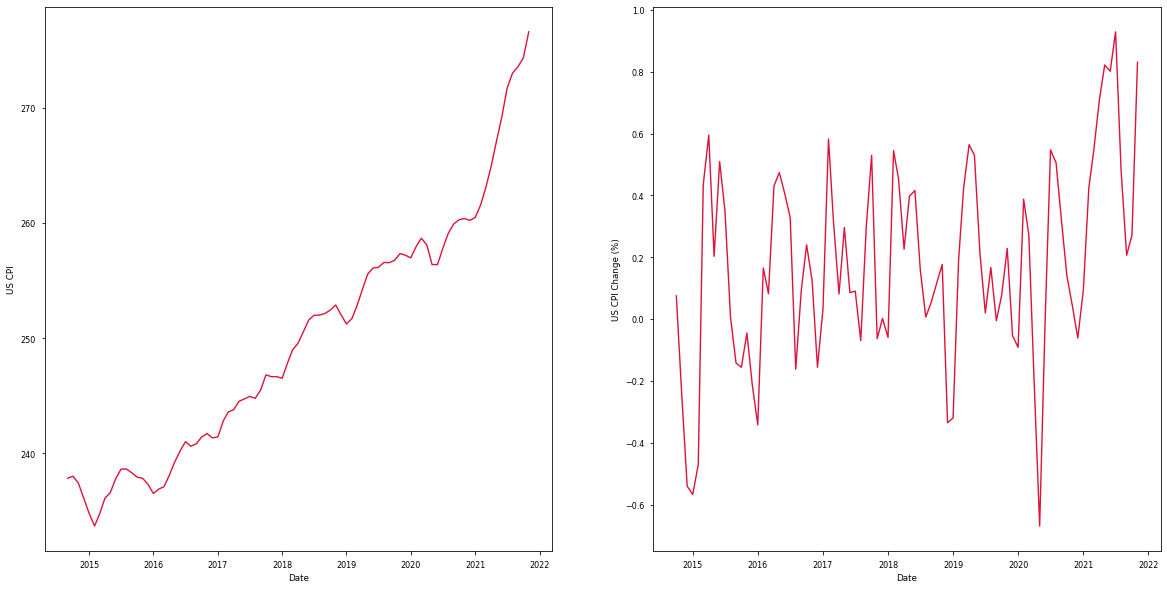

In [20]:

fig, ax = plt.subplots(1,2, figsize=(20,10))

ax[0].plot(monthly_data['cpi_us'], color='crimson')
ax[0].set_ylabel('US CPI')
ax[0].set_xlabel('Date')

ax[1].plot(monthly_data[['cpi_us']].pct_change()*100, color='crimson')
ax[1].set_ylabel('US CPI Change (%)')
ax[1].set_xlabel('Date')

plt.show()

<b>Taking inflation into account </b> is important for two reasons. First, it is important to ensure that the assets chosen for investment have the potential to deliver returns above the inflation rate. Second, when inflation increases, the assets should also appreciate in value, but ideally by a larger magnitude. 

The trajectory of inflation in America is shown in the figure above. In the seven year period under study, inflation in America increased by 16\% as measured by the Consumer Price Index (CPI) [7]. The mean monthly CPI change over the period was 0.18\%, with inflation rates close to 1\% being observed in the last quarter of 2021. Kepping in mind that the Federal Reserve targets a 'healthy' inflation rate of 2\%, deemed necessary for economic growth, this study will adopt the 2\% level as the hurdle rate which an investment must achieve in order to beat inflation. The results from the previous chapters show that all the assets being considered for this portfolio have the potential to surpass this hurdle rate, although the performance of gold could be insufficient if the inflation spike observed in late 2021 continues. Having addressed the first concern associated with inflation on investments, the second concern will be addressed below.

### Asset Correlation

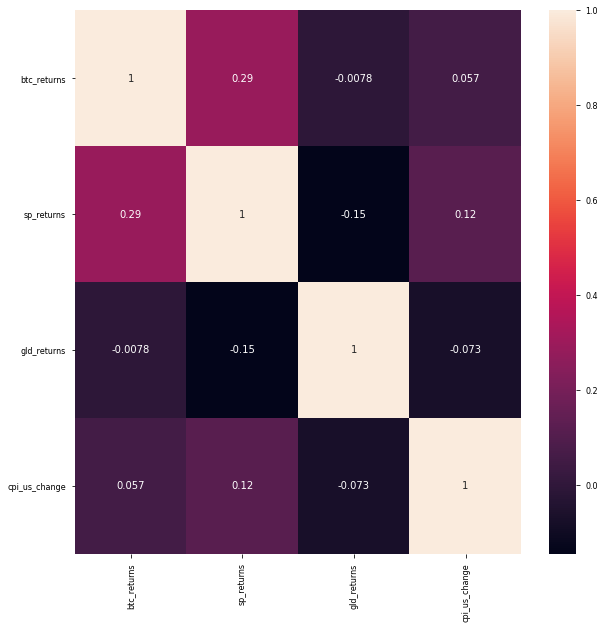

In [21]:

# calculate the Pearson correlation coefficient matrix
# this tells us how similarly each variable moves relative to another
# use correlation matrix to build correlation heatmap
returns_inflation_df = returns_df.copy()
returns_inflation_df['cpi_us_change'] = monthly_data[['cpi_us']].pct_change().dropna().to_numpy()

plt.figure(figsize=std_figure_size)
correlation_matrix = returns_inflation_df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()

Inflation reduces the real value of money, and consequently the amount of goods and services that can be exchanged for that money.  Investing is a method of curtailing the effects of inflation. In order to curtail inflationary effects, the returns from the assets that make up the portfolio must be positively correlated with inflation, meaning that as inflation rises, the assets also generate positive returns. 

As can be observed from the heatmap above, the S&P 500 is most positively correlated with the CPI, although the degree of correlation is a weak positive one. <b>In general, as inflation increases, the S&P 500 index also rises. That makes the S&P 500 index the best hedge for inflation among the the three assets.</b> Bitcoin and gold have no correlation to inflation, making them less suitable as inflation hedges. If a choice had to be made, however, Bitcoin has a slight edge over gold as an inflationary hedge due to its slight positive correlation to the CPI.

The heatmap above also showed that Bitcoin, gold and S&P 500 returns are all weakly corrlated at best, making them all ideal for inclusion into a portfolio. The rationale for including them all in the portfolio is that adding a risky asset whose returns are uncorrelated, or inversely correlated, with those of assets in the portfolio reduces the overall portfolio's risk by reducing volatility. Based on individual asset volatility, the first asset in the portfolio would be gold due to its low volatility. But what would the next asset be? According to the heatmap, gold is more inversely correlated with the S&P 500 than with Bitcoin. Therefore, adding the S&P 500 as the second asset would lower the portfolio's volatility. Finally, because Bitcoin is not correlated to gold, it is eligible for addition to the portfolio, although the benefits are slightly offset by Bitcoin's weak positive correlation to gold.

### Portfolio Optimisation

#### Applying Modern Portfolio Theory

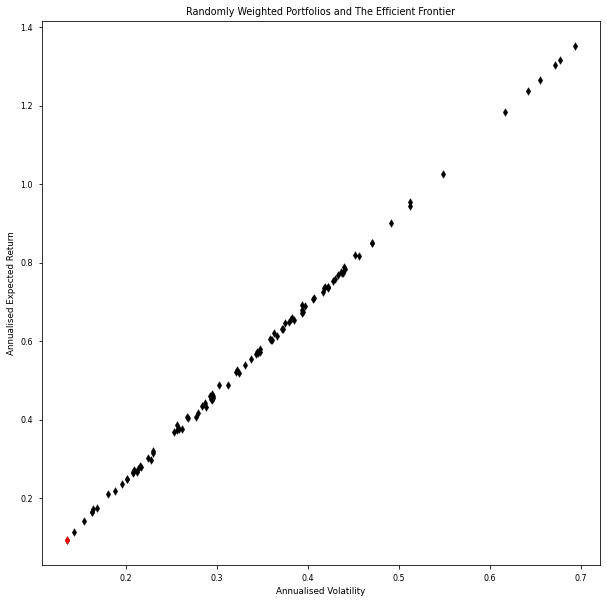

In [22]:

# Construct random weighted portfolios
assets = ['Bitcoin', 'S&P500', 'Gold']
num_assets = len(assets)
np.random.seed(36)
num_portfolios = 100

sample_portfolios = np.random.randint(100, size=(num_portfolios, num_assets))
sample_portfolio_weights = [portfolio/sum(portfolio) for portfolio in sample_portfolios]
sample_portfolio_df = pd.DataFrame(sample_portfolio_weights, columns=assets)

# Compute annualised mean return and volatility for each sample portfolio 
mean_asset_returns = returns_df.mean()
annualised_asset_returns = ((1+mean_asset_returns)**12)-1

asset_volatility = returns_df.std()
annualised_asset_volatility = asset_volatility * np.sqrt(12)

sample_portfolio_df['AnnualisedReturns'] = sample_portfolio_df.mul(annualised_asset_returns.to_numpy(), axis=1).sum(axis=1)
sample_portfolio_df['AnnualisedVolatility'] = sample_portfolio_df.iloc[:,:-1].mul(annualised_asset_volatility.to_numpy(), axis=1).sum(axis=1)

# Plot random portfolios
plt.figure(figsize=std_figure_size)
plt.scatter(sample_portfolio_df['AnnualisedVolatility'], sample_portfolio_df['AnnualisedReturns'], marker='d', color='black')
plt.scatter(np.min(sample_portfolio_df['AnnualisedVolatility']), np.min(sample_portfolio_df['AnnualisedReturns']), marker='d', color='red')
plt.title('Randomly Weighted Portfolios and The Efficient Frontier')
plt.xlabel('Annualised Volatility')
plt.ylabel('Annualised Expected Return')
plt.show()

After deciding that <b>all three assets should be added to the portfolio</b>, the next decision is what proportion of each would be optimal in order to meet the fund manager's goal of reducing overall risk. Modern Portfolio Theory [8] suggests that there exists an Efficient Frontier of portfolios that provides the lowest risk for the highest return. Given a set of portfolios whose asset weights have been generated randomly, the above figure shows the return and the volatility estimated for each portfolio. The portfolio weights chosen by the investor should be from the Efficient Frontier, which is typically found in the top left quadrant (high return, low risk).

Two popular choices of portfolio are the <b>Global Minimum Variance (GMV) portfolio</b>, and the <b>Max Sharpe Ratio (MSR) portfolio</b>. The MSR portfolio, also referred to as the Tangency portfolio, is the portfolio with the highest Sharpe ratio, which implies that it is the portfolio with the highest risk-adjusted return. The GMV portfolio is the portfolio with the lowest volatility, regardless of the return, and it is typically found on the left edge of the graph. The GMV is coloured red in the above graph. Since the fund manager's objective is risk reduction, the GMV portfolio is a suitable choice. However, it is useful and interesting to explore the properties of both the GMV and MSR portfolio relative to one another in order to make a fully informed decision. 

#### Portfolio Weighting

In [23]:

# NOTE: Sharpe ratios can change quite significantly over time
# Assume risk-free rate = 0, find optimal weights for MSR portfolio
risk_free = 0
sample_portfolio_df['Sharpe'] = (sample_portfolio_df['AnnualisedReturns'] - risk_free)/sample_portfolio_df['AnnualisedVolatility']
MSR_portfolio = sample_portfolio_df.sort_values(by=['Sharpe'], ascending=False)
MSR_weights = MSR_portfolio.iloc[0,:]
print(MSR_weights)
MSR_weights = MSR_portfolio.iloc[0,:num_assets]
print("\nRange of Sharpe ratios:")
print(sample_portfolio_df['Sharpe'].describe()[['min', 'max']])

Bitcoin                 0.840909
S&P500                  0.056818
Gold                    0.102273
AnnualisedReturns       1.352566
AnnualisedVolatility    0.693125
Sharpe                  1.951403
Name: 91, dtype: float64

Range of Sharpe ratios:
min    0.689125
max    1.951403
Name: Sharpe, dtype: float64


Assuming a risk-free rate of 0%, the <b>MSR portfolio suggests a heavy Bitcoin weight of 84\%, followed by a gold weight of 10\%, and an S&P 500 weight of 6\% </b> to compose an optimal portfolio. This portfolio achieves an estimated <b>Sharpe ratio of 1.95</b>, plus annualised returns of 135\% and 69\% annualised volatility. This result highlights the benefits of constructing a portfolio because the MSR portfolio is estimated to achieve higher returns than what gold and S&P 500 would achieve individually, along with the added benefit of lowering volatility below that of Bitcoin.  

In [24]:

# Find optimal weights for GMV portfolio
GMV_portfolio = sample_portfolio_df.sort_values(by=['AnnualisedVolatility'], ascending=True)
GMV_weights = GMV_portfolio.iloc[0,:]
print(GMV_weights)
GMV_weights = GMV_portfolio.iloc[0,:num_assets]

Bitcoin                 0.008403
S&P500                  0.277311
Gold                    0.714286
AnnualisedReturns       0.093636
AnnualisedVolatility    0.135877
Sharpe                  0.689125
Name: 24, dtype: float64


The <b>GMV portfolio suggests a heavy gold weight of 71.4\%, followed by an S&P 500 weight of 27.7\%, and finally a miniscule Bitcoin weight of 0.8\%</b>. This is not particularly surprising considering that gold and the &P 500 both exhibit lower volatility than Bitcoin in absolute terms, therefore they would be given large weights in a portfolio that optimises for low volatility. Notably, the portfolio's estimated annualised return is higher than for gold alone, while the estimated volatility is also slightly higher than it would be for gold alone. Even though the portfolio is optimising for low volatility, an additional degree of risk is accepted in order to generate higher returns. On a negative note, the Sharpe ratio of this portfolio is approximately 0.7. This is an adverse situation for portfolio construction, and would seem to advocate for an investment solely in the S&P 500; such an action would yield similar returns with a higher return-to-risk ratio. However, for the purposes of diversification with minimal risk, this GMV portfolio will be considered acceptably optimal.

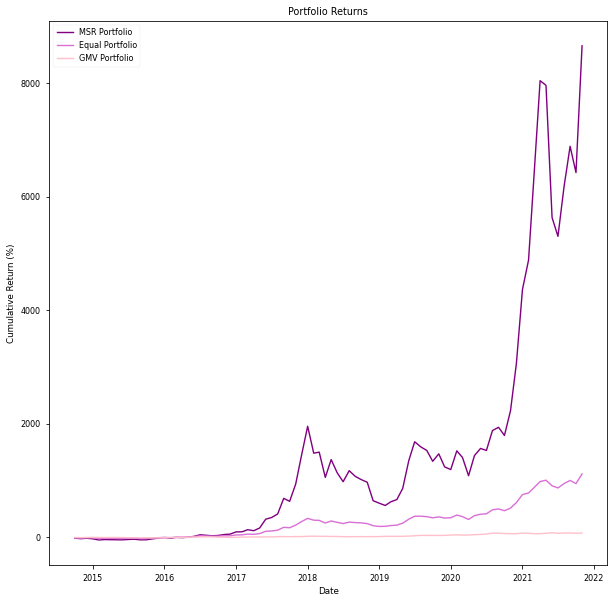

In [25]:

# How did these hypothetical portfolios ACTUALLY perform?
returns_df['MSRPortfolio'] = returns_df.mul(np.array(MSR_weights), axis=1).sum(axis=1)
returns_df['GMVPortfolio'] = returns_df.iloc[:,:-1].mul(np.array(GMV_weights), axis=1).sum(axis=1)

# Compare these results to an equal-weighted portfolio
equal_weights = np.repeat(1/num_assets, num_assets)
equal_weighted_returns = returns_df.iloc[:,:num_assets].mul(equal_weights, axis=1).sum(axis=1)
returns_df['EqualPortfolio'] = equal_weighted_returns

# construct a cumulative returns df, and plot
# GMV portfolio returns tend to be lower (lower risk) than MSR's but more stable and consistent
cum_returns_df = ((1+returns_df).cumprod() - 1) * 100

plt.figure(figsize=std_figure_size)
plt.plot(cum_returns_df['MSRPortfolio'], label='MSR Portfolio', color='purple')
plt.plot(cum_returns_df['EqualPortfolio'], label='Equal Portfolio', color='orchid')
plt.plot(cum_returns_df['GMVPortfolio'], label='GMV Portfolio', color='pink')
plt.legend()
plt.title('Portfolio Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return (%)')
plt.show()

How would these hypothetical portfolios actually perform? The above figure shows a backtest of how each portfolio would have performed. <b>The MSR portfolio would have returned a total return of 8,656\% over this period, while the GMV portfolio would have returned 78.4\% over the same period.</b> 

After expending effort towards portfolio weighting, an optimised portfolio should outperform an equal-weighted portfolio. For comparison, an equal weighted portfolio of the three assets is generated, and the results plotted above. Without overloading on any one asset, and without any prior knowledge regarding previous asset performance, <b>an equal weighted portfolio would have significantly outperformed the GMV portfolio by returning a total of 1,117\% over the seven year period</b>. It would have lagged the MSR portfolio's performance, but Sharpe ratios are known to change quite drastically over time, meaning that the real-life MSR performance would likely have looked different, while the equal-weighted portfolio's performance would have remained stable. Therefore, in the absence of constraints that force the fund manager to choose an optimally weighted portfolio, an equal weighted portfolio could provide balanced results and is worth considering.

### Portfolio Risk Management

The focus of the report will now turn to some commonly practiced risk management methodologies to assess the risk of both the GMV and the MSR portfolios. The historical drawdown of both portfolios will be assessed, along with ongoing monthly value-at-risk. The report will culminate with a simulated forecast of the potential trajectories of both portfolios using Monte Carlo simulation.


#### Historical Drawdown

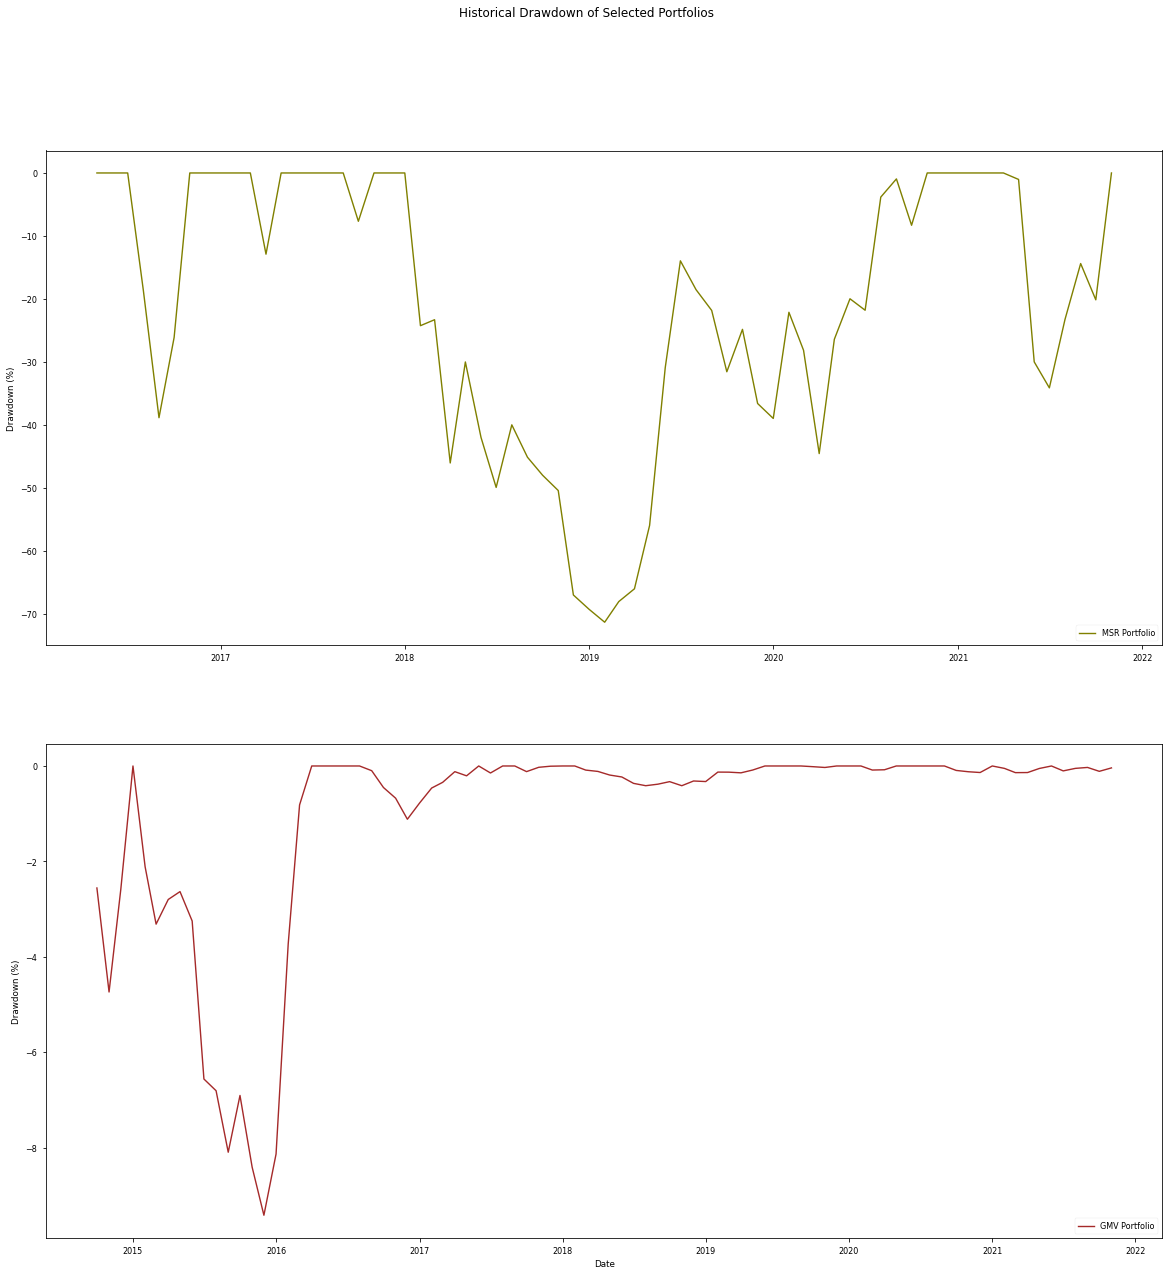

In [26]:

# GMV historical drawdown
gmv_cum_returns = cum_returns_df['GMVPortfolio']
running_max = np.maximum.accumulate(gmv_cum_returns)
running_max[running_max < 1] = 1
gmv_drawdown = (gmv_cum_returns)/running_max - 1

# MSR historical drawdown
msr_cum_returns = cum_returns_df['MSRPortfolio']
running_max = np.maximum.accumulate(msr_cum_returns)
running_max[running_max < 1] = 1
msr_drawdown = (msr_cum_returns)/running_max - 1

# Plot historical drawdowns
fig, ax = plt.subplots(2,1, figsize=(20,20))
fig.suptitle('Historical Drawdown of Selected Portfolios')
label_position='lower right'

ax[0].plot(msr_drawdown[msr_drawdown > -1]*100, label='MSR Portfolio', color='olive')
ax[0].set_ylabel('Drawdown (%)')
ax[0].legend(loc=label_position)
ax[1].plot(gmv_drawdown, label='GMV Portfolio', color='brown')
ax[1].set_ylabel('Drawdown (%)')
ax[1].legend(loc=label_position)

plt.xlabel('Date')
plt.show()

The maximum historical drawdown of the MSR portfolio, would have occured in 2019 during what has been dubbed the 'crypto winter'. As shown by the figure above, the MSR portfolio slumped 71\% from its previous high before climbing back up to previous highs. <b>The conservative GMV portfolio shows a tendency for low volatility</b>, reaching a maximum drawdown of 9\% from previous highs in 2015. According to this measure of risk, the fund manager should prefer the low volatility GMV portfolio.

#### Value-at-Risk (VaR) Estimation

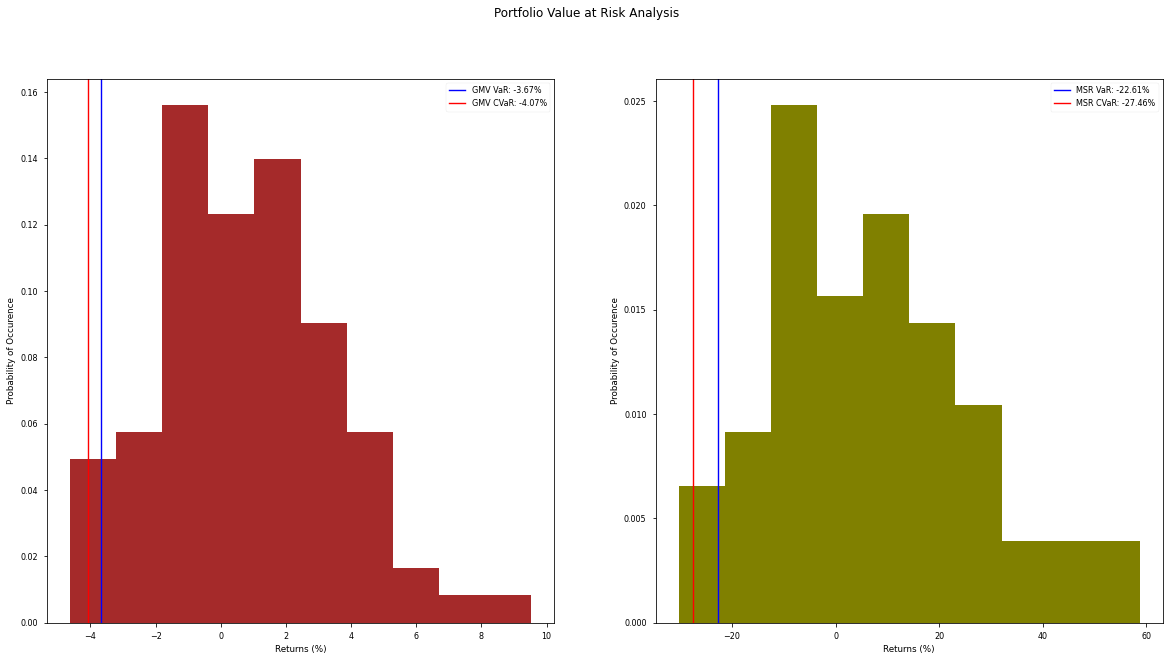

In [27]:

# Value at Risk (VaR) 
confidence_level = 95
gmv_returns = returns_df['GMVPortfolio']
gmv_returns_perc = gmv_returns*100
gmv_v_a_r = np.percentile(gmv_returns_perc, 100-confidence_level)

msr_returns = returns_df['MSRPortfolio']
msr_returns_perc = msr_returns*100
msr_v_a_r = np.percentile(msr_returns_perc, 100-confidence_level)

# Conditional Value at Risk (CVaR) 
gmv_c_v_a_r = gmv_returns_perc[gmv_returns_perc <= gmv_v_a_r].mean()

msr_c_v_a_r = msr_returns_perc[msr_returns_perc <= msr_v_a_r].mean()

# VaR/CVaR plot
fig, ax = plt.subplots(1,2, figsize=(20,10))
fig.suptitle('Portfolio Value at Risk Analysis')
y_label = 'Probability of Occurence'
x_label = 'Returns (%)'

ax[0].hist(sorted(gmv_returns_perc), density=True, color='brown')
ax[0].axvline(x=gmv_v_a_r, color='b', linestyle='-', label='GMV VaR: {0:.2f}%'.format(gmv_v_a_r))
ax[0].axvline(x=gmv_c_v_a_r, color='r', linestyle='-', label='GMV CVaR: {0:.2f}%'.format(gmv_c_v_a_r))
ax[0].set_ylabel(y_label)
ax[0].set_xlabel(x_label)
ax[0].legend()

ax[1].hist(sorted(msr_returns_perc), density=True, color='olive')
ax[1].axvline(x=msr_v_a_r, color='b', linestyle='-', label='MSR VaR: {0:.2f}%'.format(msr_v_a_r))
ax[1].axvline(x=msr_c_v_a_r, color='r', linestyle='-', label='MSR CVaR: {0:.2f}%'.format(msr_c_v_a_r))
ax[1].set_ylabel(y_label)
ax[1].set_xlabel(x_label)
ax[1].legend()

plt.show()

The monthly value-at-risk (VaR) [9] is an estimate of how much could be lost in a month, within a given confidence level. Conditional Value at Risk (CVaR) builds on the VaR by estimating the losses to be expected if the worst 5% (for 95% confidence level) of scenarios happened. The histograms above illustrate the VaR and CVaR estimates for the GMV (left) and MSR (right) portfolios. They show that at 95\% confidence level, the GMV portfolio monthly VaR is 3.67%, while that of the MSR  portfolio is a high 22.61%. At the same confidence level, the GMV portfolio monthly CVaR (always lower than the VaR) is estimated at 4.07%, while the MSR portfolio monthly CVaR is estimated at 27.46%. <b>VaR estimates support the argument that the GMV portfolio should be preferred over the MSR portfolio if the objective of constructing a low risk portfolio is to be achieved.</b>

#### Monte Carlo Simulation 

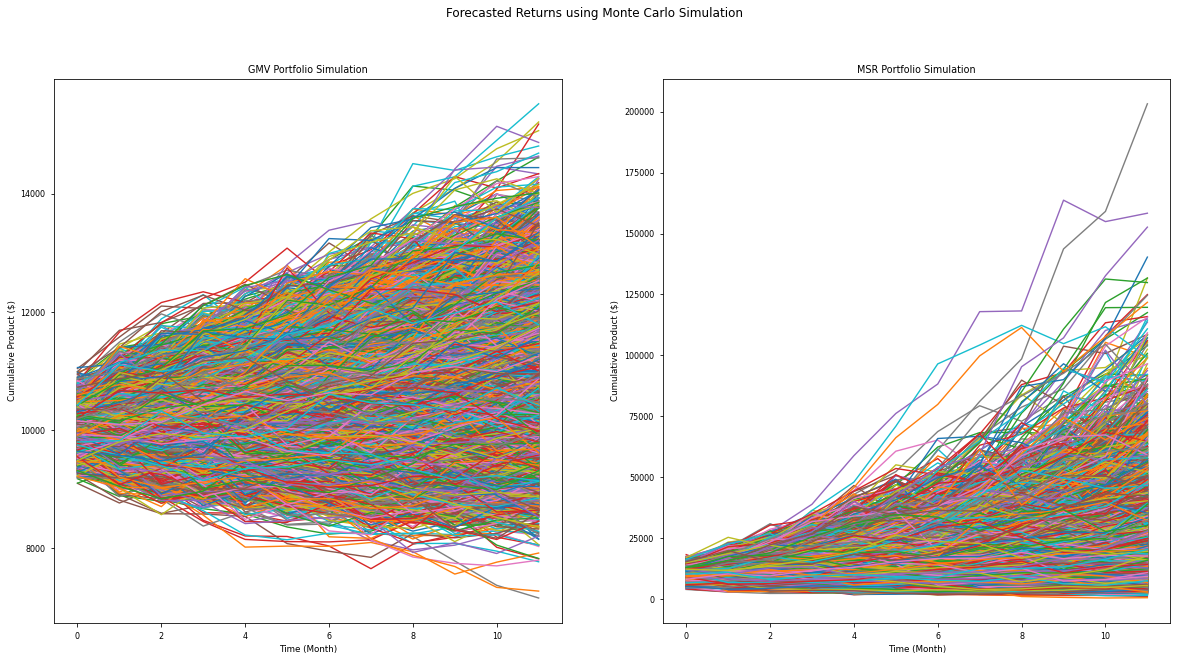

In [28]:

# Estimate future returns of the MSR and GMV portfolio over the next 12 months based on 10,000 Monte Carlo simulations

s0 = 10000 # assuming we start with $10,000
num_periods = 12
num_simulations = 10000

gmv_forecasted_series = []
msr_forecasted_series = []

gmv_ret_mu = np.mean(gmv_returns)
gmv_ret_vol = np.std(gmv_returns)
gmv_forecasted_returns = np.random.normal(gmv_ret_mu, gmv_ret_vol, num_periods)

msr_ret_mu = np.mean(msr_returns)
msr_ret_vol = np.std(msr_returns)
msr_forecasted_returns = np.random.normal(msr_ret_mu, msr_ret_vol, num_periods)

for i in range(num_simulations):
    gmv_forecasted_returns = np.random.normal(gmv_ret_mu, gmv_ret_vol, num_periods) + 1
    gmv_forecasted_series.append(s0*(gmv_forecasted_returns.cumprod()))
    msr_forecasted_returns = np.random.normal(msr_ret_mu, msr_ret_vol, num_periods) + 1
    msr_forecasted_series.append(s0*(msr_forecasted_returns.cumprod()))
    
# Plot Monte Carlo simulations
fig, ax = plt.subplots(1,2, figsize=(20,10))
fig.suptitle('Forecasted Returns using Monte Carlo Simulation')
x_label='Time (Month)'
y_label='Cumulative Product ($)'

for ser in gmv_forecasted_series:
    ax[0].plot(ser)
ax[0].set_ylabel(y_label)
ax[0].set_xlabel(x_label)
ax[0].set_title('GMV Portfolio Simulation')

for ser in msr_forecasted_series:
    ax[1].plot(ser)
ax[1].set_ylabel(y_label)
ax[1].set_xlabel(x_label)
ax[1].set_title('MSR Portfolio Simulation')
    
plt.show()



Monte Carlo simulations [10] involve sampling several random walks for a given asset in order to estimate the possible future trajectory of the asset. The above figures plot 10,000 possible future returns trajectories for each of the GMV and MSR portfolios based on historical returns. The aim of these Monte Carlo simulations is to estimate future returns in the next 12 months, beginning with a \$10,000 investment. 

The GMV portfolio is estimated to return an average of \$10,781 in 12 months. GMV forecasts range from \$7,159 to \$15,525. Conversely, the MSR portfolio is forecasted to return an average of \$22,620 in the next 12 months. MSR forecasts range from \$557 to \$203,241. Therefore, <b>implementing the GMV portfolio might result in losing 28.4\% of initial capital, whereas the MSR portfolio result in losing 94.4\% of initial capital</b>. The thesis of the GMV portfolio being the preferred portfolio is further supported by these Monte Carlo estimates. 

### Section Summary

This section on portfolio construction has led to the following insights:
<ul>
    <li>There is very little correlation among the three assets. The most correlated pair of assets, bitcoin and the S&P 500, exhibit weak positive correlation.</li>
<li>The best hedge for inflation is the S&P 500.</li>
<li>Bitcoin is a better hedge for inflation than gold.</li>
    <li>It is beneficial to add all three assets to the portfolio. Doing so increases the returns of low-performance assets while reducing the risks associated with high-volatility assets.</li> 
    <li>A Global Minimum Variance portfolio with a heavy gold weighting should be recommended to the fund manager due to its low risk.</li>
</ul>

## Recommendations
Based on the comprehensive Bitcoin, S&P 500, inflation and gold data analyses performed herein, the final recommendations of the report are as follows (presented in the exact order in which they should be executed):
<ol>
    <li>The fund manager should add Bitcoin to the fund's holdings at the earliest opportunity. Although Bitcoin is highly volatile, it is also higly profitable.</li>
    <li>In light of minimal risk being the prime consideration, the fund manager should construct a portfolio in the style of the Global Minimum Variance portfolio explored in this report. The Global Minimum Variance portfolio allocates 71.4% of capital to gold, 27.7% of capital to the S&P 500 index, and 0.8% of capital to Bitcoin.</li>
    <li>The fund manager should consider, as a secondary course of action, implementing an equal weighted portfolio of Bitcoin, the S&P 500 and gold. This course of action would require minimal assumptions to be made about the assets, and possibly a large dose of risk tolerance. However, it has the potential to yield the most optimal balance of risk and return outcomes for the portfolio.</li>
</ol>


## Future Work

Future research should further explore the lightly covered aspects of this report, such as the suitability of an equal weighted portfolio for institutional investment, or exploring a portfolio with different pairs of subsets of the three assets.

Furthermore, the results in this report do not make an attempt to distinguish between positive volatility and negative volatility. Therefore, future research could focus on quantifying the downside volatility, and using that as a basis for a more accurate return-to-risk analysis. A similar research avenue could also involve exploring a portfolio weighting scheme that optimises for a positive volatility metric such as the Sortino ratio.

## Conclusion

This report has conducted research into the suitability of Bitcoin as an institutional investment. The work involved analysing the performance of Bitcoin relative to traditional institutional investments such as the S&P 500 and gold, assessing the suitability of Bitcoin as a hedge to inflation, and constructing a portfolio to minimise an investment fund's risk.

Although Bitcoin has been found to be a highly volatile asset, it has also proven to be a highly profitable one to invest in. In order to reduce the volatility associated with Bitcoin, this report has shown that it should be considered as part of a well-diversified portfolio, and it deserves a place in an institutional portfolio due to its stellar risk-adjusted returns. The Global Minimum Variance portfolio has been suggested for this purpose, limiting Bitcoin exposure to approximately 1\% of the portfolio allocation. With time and experience, a skilled fund manager should be able to increase their allocation to Bitcoin; possibly to the point where the portfolio resembles the ultimate in optimal portfolios - the unassuming, but highly effective equal weighted portfolio.

## Bibliography
<ol>
[1] Bitcoin.org. (9 January 2022). <em>Bitcoin - open source P2P money </em> [Online]. Available: https://bitcoin.org/en/ <br>
[2] BBC. (7 September 2021). <em>Fear and excitement in El Salvador as Bitcoin becomes legal tender</em> [Online]. Available: https://www.bbc.co.uk/news/technology-58473260 <br>
[3] MicroStrategy. (4 February 2021). <em>Bitcoin corporate strategy with Michael Saylor</em> [Online]. Available: https://www.microstrategy.com/en/bitcoin/bitcoin-for-corporations <br>
    [4] Fortune. (8 October 2021). <em>Bitcoin - not gold - is the new inflation hedge, says JPMorgan</em> [Online]. Available: https://fortune.com/2021/10/08/bitcoin-not-gold-is-the-new-inflation-hedge-says-jp-morgan/ <br>
[5] Dickey, D. A., and Fuller, W. A. (1979). "Distribution of the Estimators for Autoregressive Time Series with a Unit Root", <em>Journal of the American Statistical Association</em>. 74(366): 427 - 431. https://doi.org/10.1080/01621459.1979.10482531 <br>
[6] Shapiro, S. S., and Wilk, M. B. (1965). "An analysis of variance test for normality (complete samples)", <em>Biometrika</em>. 52(3-4): 591 - 611. https://doi.org/10.1093/biomet/52.3-4.591 <br> 
[7] US Bureau of Labour Statistics. (12 October 2021). <em>Consumer Price Index</em> [Online]. Available: https://www.bls.gov/cpi/ <br>
[8] Markowitz, H. M. (1952). "Portfolio Selection". <em>The Journal of Finance</em>. 7(1): 77 - 91. https://doi.org/10.2307/2975974 <br>
[9] Jorion, P. (2006). <em>Value at Risk: The New Benchmark for Managing Financial Risk</em> (3rd ed.). McGraw-Hill. <br>
[10] Boyle, P., Broadie, M. and Glasserman, P. (1997). "Monte Carlo Methods for Security Pricing". <em>Journal of Economic Dynamics and Control</em>. 21(8-9): 1267 - 1321. https://doi.org/10.1016/S0165-1889(97)00028-6 <br>
</ol>